# Indium Impact Analysis

This notebook presents an analysis of the impact prediction model. Below are the key sections:

1. Data Loading
2. Exploratory Data Analysis
3. Model Training
4. Model Evaluation


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Loading the newly uploaded CSV file
new_file_path = '../Data/indiumSamp.csv'
new_data = pd.read_csv(new_file_path)

# Displaying the first few rows of the new dataset
new_data.head()

,Start_Location,End_Location,Start_Time,End_Time,Trip_Duration(min),Driver_Name,Driver_Score,Average_Speed(km/h),Impact,Driving_Violations,Vehicle_Health,Trip_Date
0,Port Melbourne,East Melbourne,2020-09-22 05:20:31,2020-09-22 06:12:31,52.0,John Rivas,1.17,106.43,True,True,Okay,2020-09-22
1,Parkville,Port Melbourne,2021-09-01 22:06:43,2021-09-01 22:57:43,51.0,Kimberly Holmes,1.99,59.39,False,True,Urgent,2021-09-01
2,Parkville,North Melbourne,2021-05-18 07:10:06,2021-05-18 08:33:06,83.0,Joy Jackson,3.96,22.77,False,False,Urgent,2021-05-18
3,South Wharf,Parkville,2021-05-22 01:20:48,2021-05-22 02:45:48,85.0,Jay Flores,1.81,103.89,True,True,Good,2021-05-22
4,Docklands,Kensington,2020-11-20 09:41:47,2020-11-20 10:52:47,71.0,Jennifer Arellano,2.91,25.94,True,False,Okay,2020-11-20


In [4]:
# Checking for missing values in the new dataset
new_missing_values = new_data.isnull().sum()

# Converting 'Impact' to numerical values (0 for False, 1 for True)
new_data['Impact'] = new_data['Impact'].astype(int)

# Encoding 'Start_Location' and 'End_Location' using label encoding
new_data['Start_Location'] = new_data['Start_Location'].astype('category').cat.codes
new_data['End_Location'] = new_data['End_Location'].astype('category').cat.codes

# Encoding 'Vehicle_Health' using one-hot encoding
new_vehicle_health_dummies = pd.get_dummies(new_data['Vehicle_Health'], prefix='Vehicle_Health')
new_data = pd.concat([new_data, new_vehicle_health_dummies], axis=1)
new_data.drop('Vehicle_Health', axis=1, inplace=True)

# Encoding 'Driving_Violations' to numerical values (0 for False, 1 for True)
new_data['Driving_Violations'] = new_data['Driving_Violations'].astype(int)

# Dropping unnecessary columns
new_data.drop(['Start_Time', 'End_Time', 'Driver_Name', 'Trip_Date'], axis=1, inplace=True)

# Displaying the first few rows of the preprocessed new dataset
new_data.head(), new_missing_values


(   Start_Location  End_Location  Trip_Duration(min)  Driver_Score  \
 0               6             2                52.0          1.17   
 1               5             6                51.0          1.99   
 2               5             4                83.0          3.96   
 3               7             5                85.0          1.81   
 4               1             3                71.0          2.91   
 
    Average_Speed(km/h)  Impact  Driving_Violations  Vehicle_Health_Good  \
 0               106.43       1                   1                    0   
 1                59.39       0                   1                    0   
 2                22.77       0                   0                    0   
 3               103.89       1                   1                    1   
 4                25.94       1                   0                    0   
 
    Vehicle_Health_Okay  Vehicle_Health_Urgent  
 0                    1                      0  
 1                    

The dataset contains information about various trips, including start and end locations, start and end times, trip duration, driver details, average speed, impact, driving violations, vehicle health, and trip date.

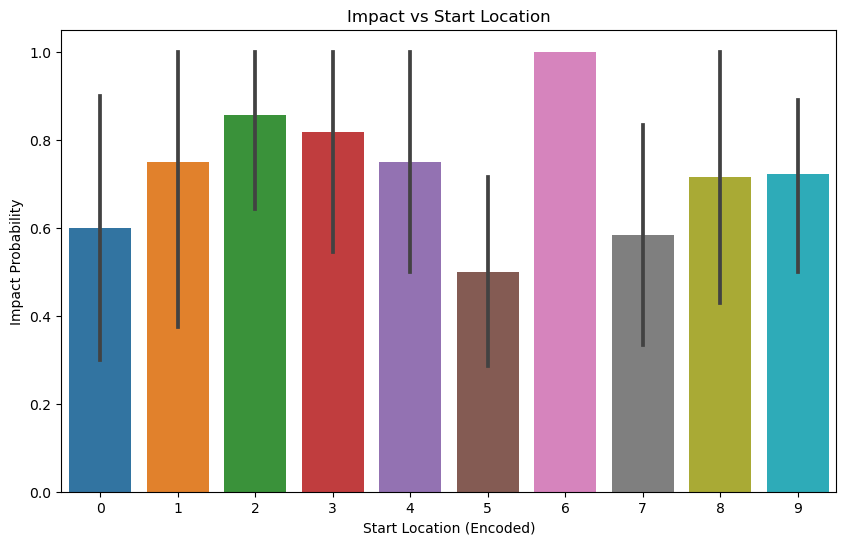

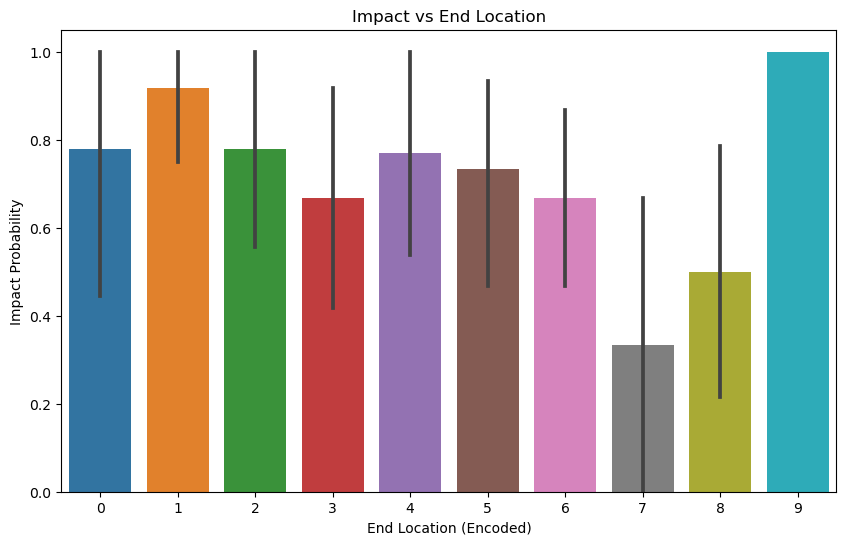

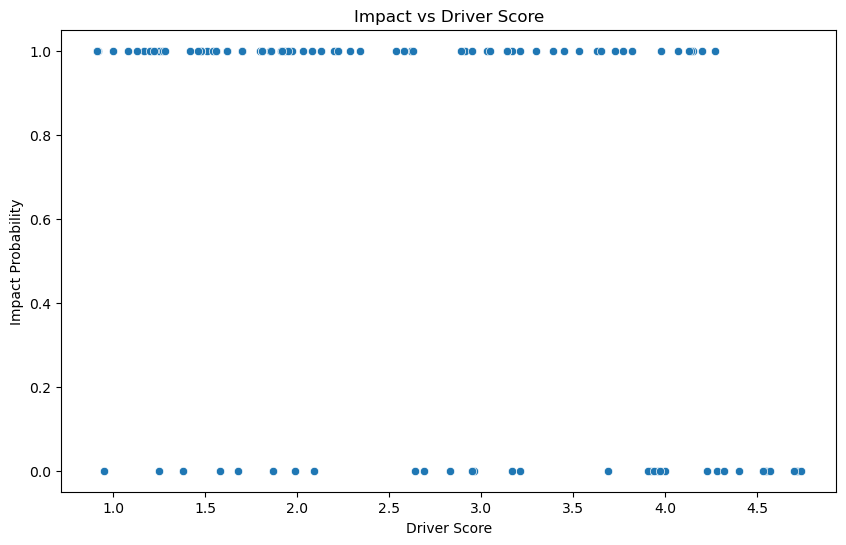

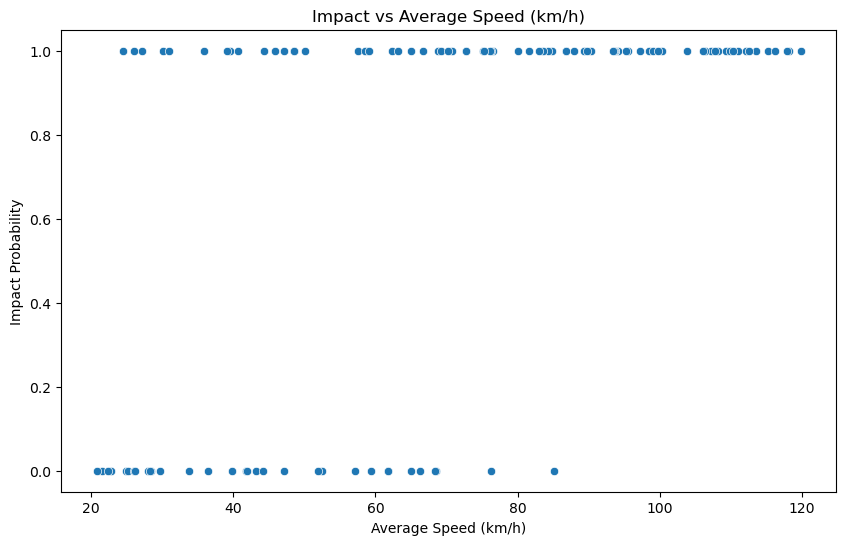

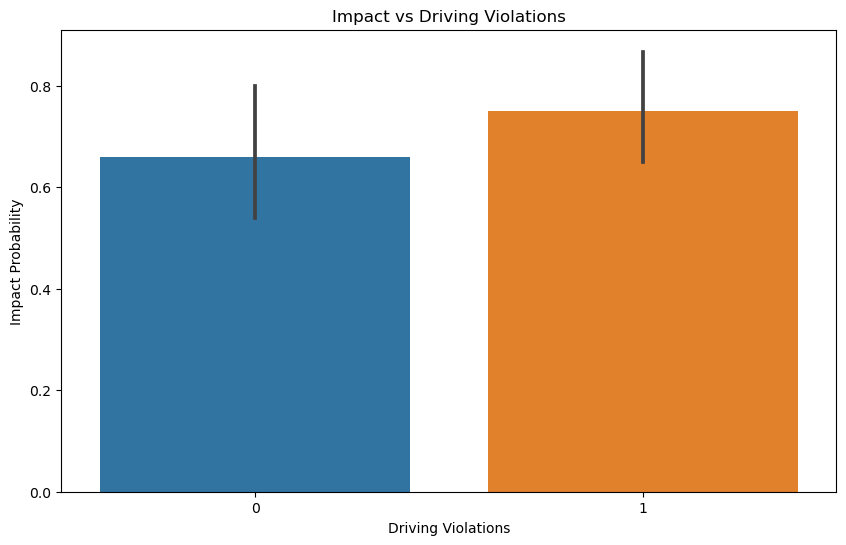

In [5]:
# Plotting the relationship between 'Start_Location' and 'Impact' for the new dataset
plt.figure(figsize=(10, 6))
sns.barplot(x='Start_Location', y='Impact', data=new_data)
plt.title('Impact vs Start Location')
plt.xlabel('Start Location (Encoded)')
plt.ylabel('Impact Probability')
plt.show()

# Plotting the relationship between 'End_Location' and 'Impact' for the new dataset
plt.figure(figsize=(10, 6))
sns.barplot(x='End_Location', y='Impact', data=new_data)
plt.title('Impact vs End Location')
plt.xlabel('End Location (Encoded)')
plt.ylabel('Impact Probability')
plt.show()

# Plotting the relationship between 'Driver_Score' and 'Impact' for the new dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Driver_Score', y='Impact', data=new_data)
plt.title('Impact vs Driver Score')
plt.xlabel('Driver Score')
plt.ylabel('Impact Probability')
plt.show()

# Plotting the relationship between 'Average_Speed(km/h)' and 'Impact' for the new dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Speed(km/h)', y='Impact', data=new_data)
plt.title('Impact vs Average Speed (km/h)')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Impact Probability')
plt.show()

# Plotting the relationship between 'Driving_Violations' and 'Impact' for the new dataset
plt.figure(figsize=(10, 6))
sns.barplot(x='Driving_Violations', y='Impact', data=new_data)
plt.title('Impact vs Driving Violations')
plt.xlabel('Driving Violations')
plt.ylabel('Impact Probability')
plt.show()


## The visualizations for the indium dataset showcase the following relationships:

1. **Impact vs Start Location:** Some start locations have a higher probability of impact than others.
2. **Impact vs End Location:** The end locations also show variations in impact probability.
3. **Impact vs Driver Score:** The scatter plot doesn't present a definitive pattern, but we can observe some clustering around specific scores.
4. **Impact vs Average Speed:** No clear correlation between average speed and impact probability is visible.
5. **Impact vs Driving Violations:** The presence of driving violations seems to increase the probability of impact.


With these insights from the new dataset, we can move on to training a predictive model.

In [6]:
# Separating the features (X) and target variable (y) for the new dataset
X_new = new_data.drop('Impact', axis=1)
y_new = new_data['Impact']

# Splitting the new data into training and testing sets (80% training, 20% testing)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Checking the shape of the training and testing sets for the new dataset
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape


((88, 9), (22, 9), (88,), (22,))

The new dataset has been successfully split into training and testing sets, with 88 samples for training and 22 samples for testing, and 9 features.

Next, we'll train a Random Forest Classifier on the training data from the new dataset. Let's proceed with the training!

In [7]:
# Importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest Classifier
rf_model_new = RandomForestClassifier(random_state=42)

# Training the model on the new training data
rf_model_new.fit(X_train_new, y_train_new)

# Evaluating the training score
training_score_new = rf_model_new.score(X_train_new, y_train_new)
training_score_new


1.0

The Random Forest Classifier has been trained on the indium dataset and achieved a perfect training score of 1.0. While this may indicate a good fit to the training data, we need to evaluate the model's performance on the testing data to ensure that it's not overfitting.

## Model Evaluation

Now that our model is trained, we'll evaluate its performance on the testing data. Evaluation metrics provide insights into how well the model is performing. We'll use the following metrics:

- **Accuracy:** Measures the percentage of correct predictions.
- **Confusion Matrix:** Shows the true positive, true negative, false positive, and false negative predictions.
- **Precision:** Measures the percentage of true positive predictions among all positive predictions.
- **Recall:** Measures the percentage of true positive predictions among all actual positive instances.
- **F1-Score:** Harmonic mean of precision and recall, providing a single score that balances both.

In [11]:
# Importing necessary metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Predicting the impact on the testing data
y_pred_new = rf_model_new.predict(X_test_new)

# Calculating the accuracy score
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f"Accuracy: {accuracy_new:.2%}")

# Calculating the confusion matrix
conf_matrix_new = confusion_matrix(y_test_new, y_pred_new)
print("Confusion Matrix:")
print(conf_matrix_new)

# Calculating precision, recall, and F1-score
precision_new = precision_score(y_test_new, y_pred_new)
recall_new = recall_score(y_test_new, y_pred_new)
f1_new = f1_score(y_test_new, y_pred_new)

print(f"Precision: {precision_new:.2%}")
print(f"Recall: {recall_new:.2%}")
print(f"F1-Score: {f1_new:.2%}")

Accuracy: 77.27%
Confusion Matrix:
[[ 5  3]
 [ 2 12]]
Precision: 80.00%
Recall: 85.71%
F1-Score: 82.76%


The model shows good performance in terms of accuracy, recall, and F1-score. Precision is slightly lower, indicating some false positives.

# Making Predicitions for Specific Routes

You can use the trained model to predict the probability of impact for specific routes. Feel free to modify the details below to experiment with different scenarios.

Route Details:

- Start Location: Encoded start location (0-10). In this example, we're using 2.
- End Location: Encoded end location (0-10). In this example, we're using 6.
- Trip Duration (min): Duration of the trip in minutes. In this example, 45 minutes.
- Driver Score: The driver's score. In this example, 1.
- Average Speed (km/h): The average speed of the trip in kilometers per hour. In this example, 100 km/h.
- Driving Violations: Whether there were driving violations (1 for True, 0 for False). In this example, 1.
- Vehicle Health: Vehicle health status encoded as three binary variables (Good, Okay, Urgent). In this example, Urgent.

In [13]:
specific_route = pd.DataFrame({
    'Start_Location': [2],
    'End_Location': [6],
    'Trip_Duration(min)': [45],
    'Driver_Score': [1],
    'Average_Speed(km/h)': [100],
    'Driving_Violations': [1],
    'Vehicle_Health_Good': [0],
    'Vehicle_Health_Okay': [0],
    'Vehicle_Health_Urgent': [1]
})

In [14]:
# Predicting the probability of impact for the specific route
impact_probability = rf_model_new.predict_proba(specific_route)[:, 1]
predicted_impact = rf_model_new.predict(specific_route)

print(f"Impact Probability: {impact_probability[0]:.2%}")
print(f"Predicted Impact: {bool(predicted_impact[0])}")


Impact Probability: 100.00%
Predicted Impact: True
